# 10. 군집화(Clustering; K-means Clustering, GMM)

## 클러스터링 VS 분류
- 클러스터링 : 정답이 없는 비지도 학습 (unsupervised), 각 개체의 그룹 정보 없이 비슷한 개체끼리 묶어보는 것
- 분류 : 정답이 있는 지도 학습 (supervised)

## 클러스터링의 목표
- 군집 간 분산(inter-cluster variance) 최대화
- 군집 내 분산(inner-cluster variance) 최소화

## 군집 타당성 평가
비지도학습의 경우 정답이 없기 때문에 일반적인 머신러닝 알고리즘처럼 단순정확도(Accuracy) 등 지표로 평가할 수 없음

### 군집 타당성 지표
- 군집 간 거리
- 군집의 지름
- 군집의 분산
- Dunn index
----

## 여러 클러스터링 알고리즘

### K-means
EM 알고리즘을 기반으로 함.
1. EM알고리즘은 Expectation 스텝과 Maximization 스템으로 나뉨
2. 이를 수렴할 때까지 반복
3. 동시에 해를 찾기 어려운 문제를 풀 때 많이 사용되는 방법론
---
- E 스텝 : 모든 개체들을 가장 가까운 중심에 군집으로 할당
- M 스텝 : 중심을 군집 경계에 맞게 업데이트

---
- Local Minima <br>
초기값 위치에 따라 원하는 결과가 나오지 않을 수 있음 <br>
클러스터의 크기나 밀도가 다를 경우 원치않는 결과가 나올 수 있음 <br>
데이터의 분포가 특이한 경우에도 잘 작동하지 않을 수 있음 <br>


- 시간 복잡도 <br>
시간복잡도가 O(n)으로 가벼운 편<br>
실제 문제에 적용할 때는 여러번 클러스터링을 수행해 가장 빈번히 등장하는 군집에 할당하는 majority voting 방법을 쓰는 경우가 많음

---
### KMeans 함수 설명

- KMeans(n_clusters,init,max_iter) 
    - n_clusters : 군집의 개수, 즉 군집 중심점의 개수
    - init : 초기 군집 중심점의 좌표를 설정할 방식 (default = ‘k-means++’)
    - max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
---
- KMeans 속성
    - labels_ : 각 데이터가 속한 군집 중심점 label
    - cluster_centers_ : 각 군집 중심점의 좌표

In [3]:
# [KMeans 실습]

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def main():
    # Iris 데이터 불러오기
    iris = load_iris()
    
    # iris 데이터 프레임 만들기
    irisDF  = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    # KMeans 객체 불러오기
    # iris 데이터는 3개의 클래스를 가지고 있으므로 3개의 군집으로 나누어줍니다.
    # irisDF를 넣어 군집화를 진행합니다.
    kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 123).fit(irisDF)
    
    # 군집화 결과를 데이터 프레임에 추가합니다.
    irisDF['target'] = iris.target
    irisDF['cluster'] = kmeans.labels_
    
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용합니다.
    # target과 cluster의 개수에 대해 sepal_length 데이터를 표현합니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
if __name__ == "__main__":
    main()

    

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal length (cm), dtype: int64


---
### KNN (K-Nearest Neighbor Algorithm, K-최근접이웃 알고리즘)
- 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k개 이웃의 정보로 새로운 데이터를 예측하는 방법론
- 레이지(lazy)모델 : 딱히 학습이라고 할 만한 것이 없음
- 하이퍼파라미터 : 탐색할 이웃 수(k), 거리 측정 방법
- k가 작을 경우 오버피팅, 반대로 클 경우 언더피팅이 일어나는 경향이 있음
- 거리 지표 : Euclidean Distance, Manhattan Distance, Mahalanobis Distance, Correlation Distance, Rank Correlation Distance

ref) https://ratsgo.github.io/machine%20learning/2017/04/17/KNN/

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.82      1.00      0.90         9

      micro avg       0.93      0.93      0.93        30
      macro avg       0.94      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30



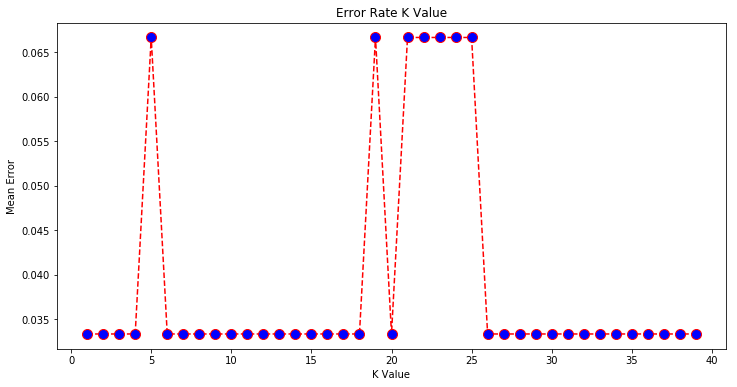

In [18]:
# [KNN 실습]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def main():
    # 데이터 불러오기
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    names = ['sepal-length','sepal-width','petal-length','petal-width','Class']
    dataset = pd.read_csv(url,names = names)
    
    # preprocessing
    X = dataset.iloc[:, :-1].values # iloc[행 기준, 열기준]
    y = dataset.iloc[:, 4].values # y는 labels
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    
    # Feature Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Training and Predictions
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    # 알고리즘을 평가
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Error Rate와 K Value 비교
    error = []
    
    # Calculating error for k values between 1 and 4
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    
if __name__ == "__main__":
    main()

---
### GMM (Gaussian Mixture Model)

- Gaussian 분포가 여러 개 혼합된 clustering 알고리즘. <br>
- GMM은 전체 데이터의 확률분포가 여러 개의 정규분포의 조합으로 이루어져 있다고 가정하고 각 분포에 속할 확률이 높은 데이터끼리 클러스터링 하는 방법
- 다변수 정규분포를 가정할수도 있음.
- K-means 등의 클러스터링 알고리즘으로 잘 묶을 수 없었던 데이터에서도 잘 작동함
- 데이터들이 여러개의 정규분포에서 나왔다고 가정

**단점**
- 계산량이 많기 때문에 다량의 데이터에 사용하기 어려움
- 유형들의 분포가 정규 분포와 차이가 크다면 결과가 좋지 못함

---
- GaussianMixture(n_components) 
    - n_components : 군집의 개수

---
### 계층적 클러스터링(HC)

- 계층적 트리 모형을 이용해 개별 개체들을 순차적, 계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘
- 클러스터의 수를 사전에 정하지 않아도 학습 수행가능 (트리가 결정해줌)
- 개체들이 결합되는 순서를 나타내는 트리형태 구조인 덴드로그램(Dendrogram)을 생성한 후 적절한 수준에서 트리를 자르면 클러스터링이 완료됨
- 데이터 각 쌍에 대해서는 유사도를 측정할 수 있지만 평균이나 분산 등을 구할 수 없는 경우에 사용할 수 있는 기법
- HC를 수행하려면 모든 개체들 간 거리(distance)나 유사도(similarity)가 이미 계산되어 있어야 함 

**단점**
- 계산량이 많기 때문에 다량의 데이터에 사용하기 어려움

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64 

target  Kmean_cluster
0       1                50
1       2                48
        0                 2
2       0                36
        2                14
Name: Kmean_cluster, dtype: int64


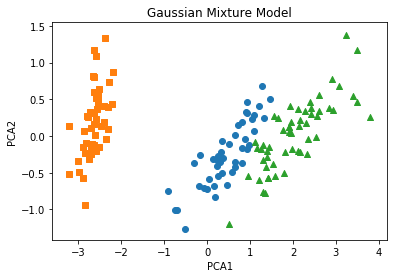

In [20]:
# [Gaussian Mixture Model (GMM) 실습]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
feature_names = iris.feature_names

iris_df = pd.DataFrame(data =iris.data, columns = feature_names)
iris_df['target'] = iris.target

def Visualize():
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(iris.data)

    iris_df['pca_x'] = pca_transformed[:,0]
    iris_df['pca_y'] = pca_transformed[:,1]


    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = iris_df[iris_df['gmm_cluster'] == 0].index
    idx_1 = iris_df[iris_df['gmm_cluster'] == 1].index
    idx_2 = iris_df[iris_df['gmm_cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=iris_df.loc[idx_0, 'pca_x'], y= iris_df.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=iris_df.loc[idx_1, 'pca_x'], y= iris_df.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=iris_df.loc[idx_2, 'pca_x'], y= iris_df.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('Gaussian Mixture Model')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("plot.png")
    
def main():
	# 1.Gaussian Mixture Model 불러오기 및 학습
    gmm = GaussianMixture(n_components = 3).fit(iris.data)
    # 2.predict 값 출력
    gmm_cluster_labels = gmm.predict(iris.data)
    
    # 3.DataFrame에 예측 값 넣기
    iris_df['gmm_cluster'] = gmm_cluster_labels
    
    # 결과 출력
    iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
    print(iris_result,'\n')
    
    # 4.Kmeans 불러오기 및 학습
    kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 123).fit(iris.data)
    # 5.predict 값 출력
    kmeans_cluster_labels = kmeans.predict(iris.data)
    
    # 6.DataFrame에 예측 값 넣기
    iris_df['Kmean_cluster'] = kmeans_cluster_labels
    iris_result = iris_df.groupby(['target'])['Kmean_cluster'].value_counts()
    print(iris_result)
    
    Visualize()
    
if __name__ == "__main__":
    main()
